<div id="container" style="position:relative;">
<div style="float:left"><h1> Owner: Asli Keser </h1></div>  
      <div style="clear:both;"></div> 
<div style="float:left"><h2> Unit3Deliverable#5 - NLP With Hotel Review - Q2 & Q3 </h2></div>
<div style="position:relative; float:right">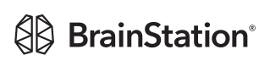
</div>
</div>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Preprocessing

2. Split the data into train and test sets and transform the positive and negative review columns using a CountVectorizer. Consider the following:

- What tokenizer and text cleaning steps do you include?
- Using the vectorizer, maximize the number of features at 500 and make sure that tokens used <10 times are dropped from the vocabulary.

This process may be done on the positive and negative review columns separately and then the resulting arrays merged with the original numeric features to form the final train and test data frames ready for modelling. In your column names, make sure you mark which words are coming from the positive vs negative reviews (you can use a prefix such as pos_ and neg_).


In [2]:
# Read in the clean data csv to a DataFrame
df = pd.read_csv('Hotel_Reviews_Clean.csv')

In [3]:
# Print out the shape of the df
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the df.')

There are 515199 rows and 29 columns in the df.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515199 entries, 0 to 515198
Data columns (total 29 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515199 non-null  int64  
 1   Average_Score                               515199 non-null  float64
 2   Negative_Review                             387444 non-null  object 
 3   Review_Total_Negative_Word_Counts           515199 non-null  int64  
 4   Total_Number_of_Reviews                     515199 non-null  int64  
 5   Positive_Review                             479298 non-null  object 
 6   Review_Total_Positive_Word_Counts           515199 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515199 non-null  int64  
 8   Reviewer_Score                              515199 non-null  int64  
 9   Days_Since_Review                           515199 non-null  int64  
 

In [5]:
df.head(10)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,NaN,0,1403,No real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,...,0,1,1,0,0,0,0,0,1,2
5,194,7.7,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,0,10,...,0,1,1,0,0,0,0,0,1,1
6,194,7.7,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,0,17,...,0,0,1,0,0,0,0,0,1,5
7,194,7.7,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,1,17,...,0,0,1,0,0,0,0,0,1,2
8,194,7.7,Even though the pictures show very clean room...,34,1403,NaN,0,3,0,25,...,0,1,1,0,0,0,0,0,1,1
9,194,7.7,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,0,26,...,0,1,1,0,0,0,0,0,1,7


The empty strings are automatically replaced with 'NaN' in the imported csv file.

In [6]:
# replace "NaN" values in 'Positive_Review' and 'Negative_Review' columns with empty strings
df.Positive_Review = df.Positive_Review.fillna('')
df.Negative_Review = df.Negative_Review.fillna('')

In [7]:
df.head(10)

,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,...,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,...,0,1,1,0,0,0,0,0,1,6
1,194,7.7,,0,1403,No real complaints the hotel was great great ...,105,7,0,0,...,0,0,1,0,0,0,0,0,1,4
2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,...,0,0,1,0,0,0,0,0,1,3
3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,...,0,0,1,0,0,0,0,0,1,3
4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,...,0,1,1,0,0,0,0,0,1,2
5,194,7.7,Backyard of the hotel is total mess shouldn t...,17,1403,Good restaurant with modern design great chil...,20,1,0,10,...,0,1,1,0,0,0,0,0,1,1
6,194,7.7,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,0,17,...,0,0,1,0,0,0,0,0,1,5
7,194,7.7,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,1,17,...,0,0,1,0,0,0,0,0,1,2
8,194,7.7,Even though the pictures show very clean room...,34,1403,,0,3,0,25,...,0,1,1,0,0,0,0,0,1,1
9,194,7.7,The aircondition makes so much noise and its ...,15,1403,The room was big enough and the bed is good T...,50,1,0,26,...,0,1,1,0,0,0,0,0,1,7


In [8]:
X = df.drop(columns='Reviewer_Score').copy() # create a dataframe for feature columns 
y = df.Reviewer_Score.copy() # create a dataframe for target column

In [9]:
# split train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

__test_size__: 30% of the original dataset is set to be test data.

__random_state__: a certain pattern of random selection is set.

__stratify__: In order to prevent inbalanced distribution of positive and negative review count between train and test data, stratify parameter is used.

In [10]:
X_train.shape # 70% of original dataframe

(360639, 28)

In [11]:
X_test.shape # 30% of original dataframe

(154560, 28)

In [12]:
# Non-numeric columns are eliminated in both train and test datasets
# Eliminated columns: ['Positive_Review', 'Negative_Review']
X_train_num = X_train.select_dtypes(include='number')
X_test_num = X_test.select_dtypes(include='number')
# X_train_num = X_train.select_dtypes(include=numerics) #another way of doing it

# Extract 'Positive_Review' column in both train and test datasets
pos_rev_train = X_train['Positive_Review'].copy()
pos_rev_test = X_test['Positive_Review'].copy()

# Extract 'Negative_Review' column in both train and test datasets
neg_rev_train = X_train['Negative_Review'].copy()
neg_rev_test = X_test['Negative_Review'].copy()

Copies of the original train and test datasets are used to create the new datasets above. This precautionary measure is essential because any future modifications made to the selected columns in these new datasets, without using the .copy() function, would also impact the original dataset.

*Keep in mind that index columns are not reset right now.

## Bag-of-Words

In a bag-of-words model, we examine the words within our corpus by counting their occurrences in each document, thereby converting these counts into features to construct the document-term matrix. 

In this matrix, each document is represented as a row, while every distinct word in the corpus becomes a separate column.

- maximize the number of features at 500 (max_features=500)
- drop the tokens used <10 times from the vocabulary (min_df=10)


 Vectorize by considering:
   - Stopwords
   - Punctuation
   - Stemming



In [13]:
# Vectorize the positive review column in both train and test datasets 
pos_rev_vec = CountVectorizer(analyzer='word', # count of each unique word 
                              max_features=500, # maximize the number of features at 500
                              min_df=10, # drop the tokens used <10 times
                              stop_words='english'
                              )
pos_rev_vec.fit(pos_rev_train)
pos_rev_train_t = pos_rev_vec.transform(pos_rev_train)
pos_rev_test_t = pos_rev_vec.transform(pos_rev_test)

In CountVectorizer( ),
- __punctuation__ is completely ignored and always treated as a token separator.
- stop_words='english' parameter in CountVectorizer eliminates words such as 'the', 'to', 'and', 'a', etc.

In [14]:
print(pos_rev_train_t) # CSR format helps minimize the storage that a dense matrix takes

  (0, 31)	1
  (0, 40)	1
  (0, 88)	2
  (0, 104)	1
  (0, 195)	1
  (0, 214)	1
  (0, 230)	1
  (0, 251)	1
  (0, 279)	1
  (0, 319)	1
  (0, 368)	1
  (0, 399)	1
  (0, 404)	1
  (0, 452)	1
  (0, 461)	1
  (0, 475)	1
  (2, 13)	1
  (2, 20)	1
  (2, 47)	1
  (2, 68)	1
  (2, 86)	1
  (2, 88)	1
  (2, 91)	1
  (2, 98)	1
  (2, 116)	1
  :	:
  (360635, 101)	1
  (360635, 158)	1
  (360635, 208)	1
  (360635, 225)	1
  (360635, 405)	1
  (360636, 52)	1
  (360636, 251)	1
  (360636, 365)	1
  (360637, 88)	1
  (360637, 156)	1
  (360637, 185)	1
  (360637, 208)	1
  (360637, 251)	1
  (360637, 405)	1
  (360638, 91)	1
  (360638, 176)	1
  (360638, 185)	1
  (360638, 208)	1
  (360638, 251)	1
  (360638, 303)	1
  (360638, 371)	1
  (360638, 385)	1
  (360638, 405)	1
  (360638, 410)	1
  (360638, 459)	1


In [15]:
pos_rev_train_t_df = pd.DataFrame(
        data = pos_rev_train_t.todense(), 
        columns = pos_rev_vec.get_feature_names_out() )
pos_rev_train_t_df.head()

,10,15,20,24,30,able,absolutely,access,accommodating,afternoon,...,window,windows,wine,wonderful,work,worked,working,worth,year,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
pos_rev_vec.get_feature_names_out()

array(['10', '15', '20', '24', '30', 'able', 'absolutely', 'access',
       'accommodating', 'afternoon', 'air', 'airport', 'albert',
       'amazing', 'ambience', 'amenities', 'amsterdam', 'anniversary',
       'appointed', 'appreciated', 'area', 'areas', 'arrival', 'arrived',
       'ask', 'asked', 'atmosphere', 'attention', 'attentive',
       'attractions', 'available', 'away', 'awesome', 'bad', 'bags',
       'balcony', 'bar', 'barcelona', 'bars', 'bath', 'bathroom',
       'bathrooms', 'beach', 'beautiful', 'beautifully', 'bed', 'bedroom',
       'beds', 'best', 'better', 'big', 'birthday', 'bit', 'bonus',
       'book', 'booked', 'booking', 'bottle', 'boutique', 'breakfast',
       'breakfasts', 'bridge', 'brilliant', 'buffet', 'building', 'bus',
       'buses', 'business', 'busy', 'cafes', 'cake', 'came', 'canal',
       'car', 'card', 'center', 'central', 'centre', 'champagne',
       'charge', 'charming', 'check', 'checked', 'choice', 'choices',
       'choose', 'city', 'clas

In [17]:
pos_rev_train_t_df.shape # max_features=500

(360639, 500)

In [18]:
pos_rev_test_t_df = pd.DataFrame(
        data = pos_rev_test_t.todense(), 
        columns = pos_rev_vec.get_feature_names_out() )
pos_rev_test_t_df.head() 

,10,15,20,24,30,able,absolutely,access,accommodating,afternoon,...,window,windows,wine,wonderful,work,worked,working,worth,year,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
pos_rev_test_t_df.shape # max_features=500

(154560, 500)

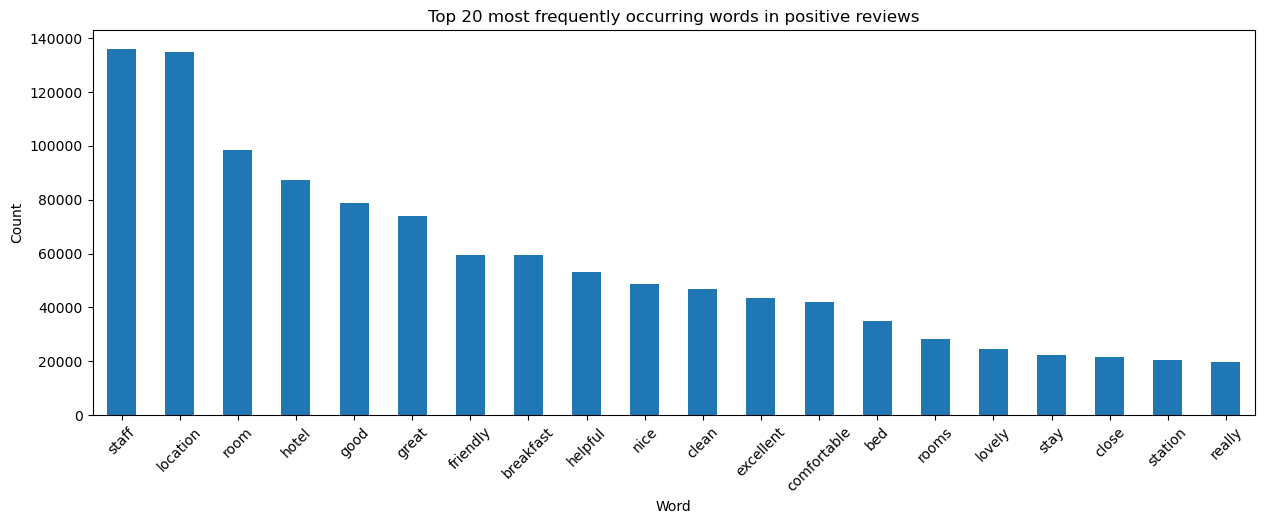

In [20]:
# create a bar chart for frequently occurring words in Positive Reviews
pos_word_counts = pd.DataFrame(
    {"counts": pos_rev_train_t.toarray().sum(axis=0)},
    index=pos_rev_vec.get_feature_names_out()
).sort_values("counts", ascending=False)

pos_word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words in positive reviews")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Observing the chart above, it's evident that 'room' and 'rooms' are listed as distinct words, despite having the same meaning. Therefore, they can be combined within the same column for analysis. This process is called stemming.

In [21]:
# Vectorize the negative review column in both train and test datasets 
neg_rev_vec = CountVectorizer(analyzer='word', # count of each unique word 
                              max_features=500, # maximize the number of features at 500
                              min_df=10, # drop the tokens used <10 times
                              stop_words='english'
                              )
neg_rev_vec.fit(neg_rev_train)
neg_rev_train_t = neg_rev_vec.transform(neg_rev_train)
neg_rev_test_t = neg_rev_vec.transform(neg_rev_test)

In [22]:
neg_rev_train_t_df = pd.DataFrame(
        data = neg_rev_train_t.todense(), 
        columns = neg_rev_vec.get_feature_names_out() )
neg_rev_train_t_df.head()

,00,10,12,15,20,30,50,able,absolutely,ac,...,windows,work,worked,working,works,worn,worst,worth,wouldn,wrong
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
neg_rev_train_t_df.shape

(360639, 500)

In [24]:
neg_rev_test_t_df = pd.DataFrame(
        data = neg_rev_test_t.todense(), 
        columns = neg_rev_vec.get_feature_names_out() )
neg_rev_test_t_df.head()

,00,10,12,15,20,30,50,able,absolutely,ac,...,windows,work,worked,working,works,worn,worst,worth,wouldn,wrong
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
neg_rev_test_t_df.shape

(154560, 500)

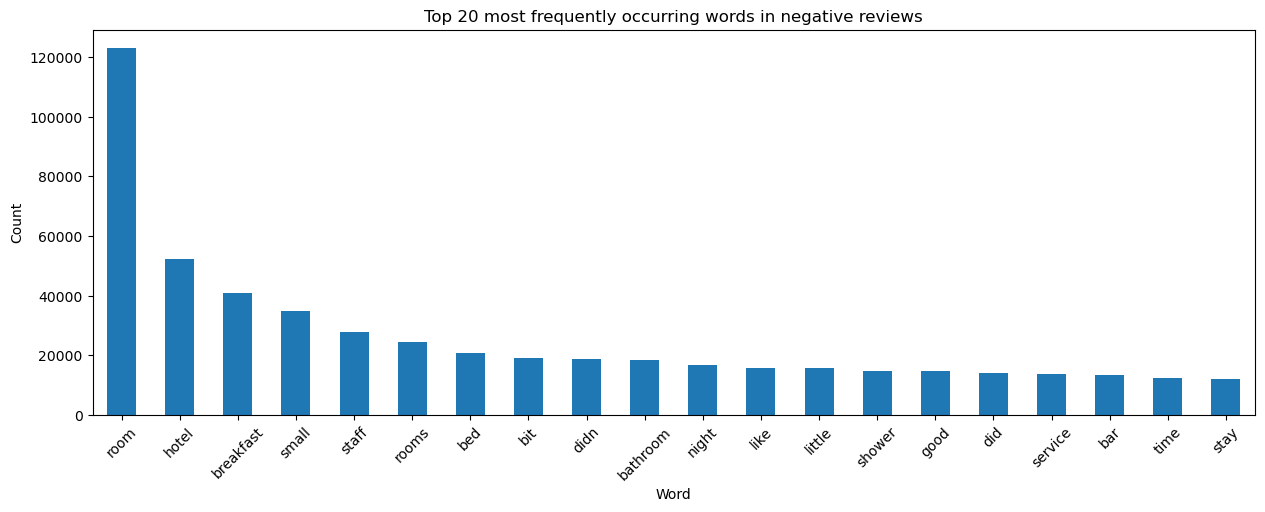

In [26]:
# create a bar chart for frequently occurring words in Negative Reviews
neg_word_counts = pd.DataFrame(
    {"counts": neg_rev_train_t.toarray().sum(axis=0)},
    index=neg_rev_vec.get_feature_names_out()
).sort_values("counts", ascending=False)

neg_word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words in negative reviews")
plt.xlabel("Word")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Same stemming issue exists in the above chart.

### Stemming

In above column names, it can be seen that '_work_','_worked_', '_working_', '_works_' words carry the same meaning but there are four different columns exist for this word. In order to eliminate this issue we need to apply __stemming__.

In [27]:
# create custom tokenizer
import nltk
import string
# print(string.punctuation)

nltk.download('stopwords')
from nltk.corpus import stopwords 

ENGLISH_STOP_WORDS = stopwords.words('english')

def my_tokenizer(sentence):
    stemmer = nltk.stem.PorterStemmer()
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

[nltk_data] Downloading package stopwords to /Users/Work/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Vectorize the positive review column in both train and test datasets with custom tokenizer
pos_rev_vec_stem = CountVectorizer(max_features=500, # maximize the number of features at 500
                                   min_df=10, # drop the tokens used <10 times
                                   tokenizer=my_tokenizer 
                                  )
pos_rev_vec_stem.fit(pos_rev_train)
pos_rev_train_t_stem = pos_rev_vec_stem.transform(pos_rev_train)
pos_rev_test_t_stem = pos_rev_vec_stem.transform(pos_rev_test)

/Users/Work/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [29]:
print(pos_rev_train_t_stem)

  (0, 0)	1
  (0, 40)	1
  (0, 49)	1
  (0, 90)	2
  (0, 106)	1
  (0, 202)	1
  (0, 220)	1
  (0, 239)	1
  (0, 257)	1
  (0, 280)	1
  (0, 320)	1
  (0, 371)	1
  (0, 402)	1
  (0, 407)	1
  (0, 457)	1
  (0, 468)	1
  (0, 478)	1
  (2, 19)	1
  (2, 22)	1
  (2, 32)	1
  (2, 33)	1
  (2, 52)	1
  (2, 69)	1
  (2, 88)	1
  (2, 90)	1
  :	:
  (360635, 213)	1
  (360635, 229)	1
  (360635, 408)	1
  (360636, 58)	1
  (360636, 178)	1
  (360636, 257)	1
  (360636, 368)	1
  (360637, 90)	1
  (360637, 157)	1
  (360637, 189)	1
  (360637, 213)	1
  (360637, 257)	1
  (360637, 408)	1
  (360638, 92)	1
  (360638, 176)	1
  (360638, 189)	1
  (360638, 213)	1
  (360638, 257)	1
  (360638, 300)	1
  (360638, 373)	1
  (360638, 376)	1
  (360638, 390)	1
  (360638, 408)	1
  (360638, 412)	1
  (360638, 465)	1


In [30]:
pos_rev_vec_stem.get_feature_names_out()

array(['1', '10', '15', '2', '20', '3', '30', '4', '5', 'abl', 'absolut',
       'access', 'accommod', 'across', 'afternoon', 'air', 'airport',
       'allow', 'almost', 'also', 'although', 'alway', 'amaz', 'ambienc',
       'amen', 'amsterdam', 'anniversari', 'anoth', 'anyth', 'apart',
       'appoint', 'appreci', 'area', 'around', 'arriv', 'ask',
       'atmospher', 'attent', 'attract', 'avail', 'away', 'awesom',
       'back', 'bad', 'bag', 'balconi', 'bar', 'barcelona', 'bath',
       'bathroom', 'beach', 'beauti', 'bed', 'bedroom', 'best', 'better',
       'big', 'birthday', 'bit', 'block', 'bonu', 'book', 'bottl',
       'boutiqu', 'breakfast', 'brilliant', 'bu', 'buffet', 'build',
       'busi', 'cafe', 'cake', 'call', 'came', 'canal', 'car', 'card',
       'care', 'center', 'centr', 'central', 'chang', 'charg', 'charm',
       'check', 'chocol', 'choic', 'choos', 'citi', 'class', 'clean',
       'cleanli', 'close', 'club', 'cocktail', 'coffe', 'cold', 'come',
       'comfi', 'c

As it can be seen from the feature names, diffirent variations of 'work' is eliminated from feature names list since all of them are converted into 'work' which is the simlest form of this word.

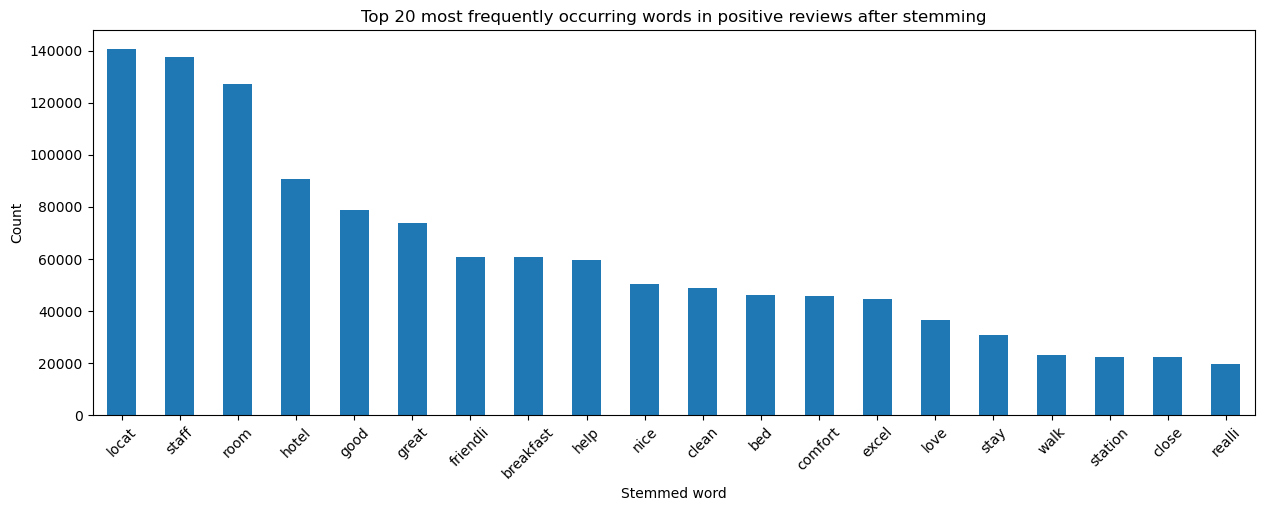

In [31]:
# create a bar chart for frequently occurring words in Positive Reviews after stemming
pos_word_counts_stem = pd.DataFrame(
    {"counts": pos_rev_train_t_stem.toarray().sum(axis=0)},
    index=pos_rev_vec_stem.get_feature_names_out()
).sort_values("counts", ascending=False)

pos_word_counts_stem.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words in positive reviews after stemming")
plt.xlabel("Stemmed word")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Also, 'rooms' word does not exist in the feature names anymore since after stemming it is converted to 'room'.

In [32]:
# top 20 most frequently occuring words in Positive_Review column in training dataset
pos_word_counts_stem.sort_values("counts", ascending=False).head(20)

,counts
locat,140798
staff,137543
room,127047
hotel,90812
good,78748
great,73830
friendli,60951
breakfast,60624
help,59598
nice,50407


In [33]:
pos_word_counts_stem.shape # max_features=500

(500, 1)

We might have the same column name for pos and neg words so we need to tag them properly to avoid any confusion during modeling.

In [34]:
#add POS_ tag to all positive review words' columns
pos_feature_names=list("POS_{}".format(w) for w in pos_rev_vec_stem.get_feature_names_out()) 

In [35]:
# create dataframe for columns of each word in Positive_Review column of training dataset
pos_rev_train_t_df_stem = pd.DataFrame(
        data = pos_rev_train_t_stem.todense(), 
        columns = pos_feature_names)
pos_rev_train_t_df_stem.head()

,POS_1,POS_10,POS_15,POS_2,POS_20,POS_3,POS_30,POS_4,POS_5,POS_abl,...,POS_window,POS_wine,POS_within,POS_without,POS_wonder,POS_work,POS_worth,POS_would,POS_year,POS_yet
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# create dataframe for columns of each word in Positive_Review column of training dataset filled with test data
# if there are new words in the test set that were not present in the training data, they get ignored
pos_rev_test_t_df_stem = pd.DataFrame(
        data = pos_rev_test_t_stem.todense(), 
        columns = pos_feature_names)
pos_rev_test_t_df_stem.head()

,POS_1,POS_10,POS_15,POS_2,POS_20,POS_3,POS_30,POS_4,POS_5,POS_abl,...,POS_window,POS_wine,POS_within,POS_without,POS_wonder,POS_work,POS_worth,POS_would,POS_year,POS_yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
pos_rev_train_t_df_stem.shape

(360639, 500)

In [38]:
pos_rev_test_t_df_stem.shape

(154560, 500)

In [39]:
# Vectorize the negative review column in both train and test datasets with custom tokenizer 
neg_rev_vec_stem = CountVectorizer(
#                             analyzer='word', # count of each unique word 
                              max_features=500, # maximize the number of features at 500
                              min_df=10, # drop the tokens used <10 times
#                               stop_words='english',
                              tokenizer=my_tokenizer
                              )
neg_rev_vec_stem.fit(neg_rev_train)
neg_rev_train_t_stem = neg_rev_vec_stem.transform(neg_rev_train)
neg_rev_test_t_stem = neg_rev_vec_stem.transform(neg_rev_test)

/Users/Work/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [40]:
neg_rev_vec_stem.get_feature_names_out()

array(['00', '1', '10', '12', '15', '2', '20', '3', '30', '4', '5', '50',
       '6', '7', '8', 'abl', 'absolut', 'ac', 'access', 'actual', 'addit',
       'advertis', 'air', 'airport', 'allow', 'almost', 'alreadi', 'also',
       'although', 'alway', 'amount', 'annoy', 'anoth', 'anyth', 'apart',
       'area', 'around', 'arriv', 'ask', 'avail', 'averag', 'aw', 'away',
       'back', 'bad', 'bag', 'bar', 'basement', 'basic', 'bath',
       'bathroom', 'bed', 'bedroom', 'best', 'better', 'big', 'bigger',
       'bill', 'bit', 'block', 'book', 'bottl', 'breakfast', 'broken',
       'buffet', 'build', 'busi', 'call', 'came', 'car', 'card', 'care',
       'carpet', 'case', 'center', 'centr', 'central', 'chair', 'chang',
       'channel', 'charg', 'check', 'choic', 'citi', 'clean', 'cleaner',
       'clear', 'close', 'cloth', 'coffe', 'cold', 'com', 'come',
       'comfort', 'compar', 'complain', 'complaint', 'complet',
       'complimentari', 'con', 'condit', 'connect', 'consid', 'construc

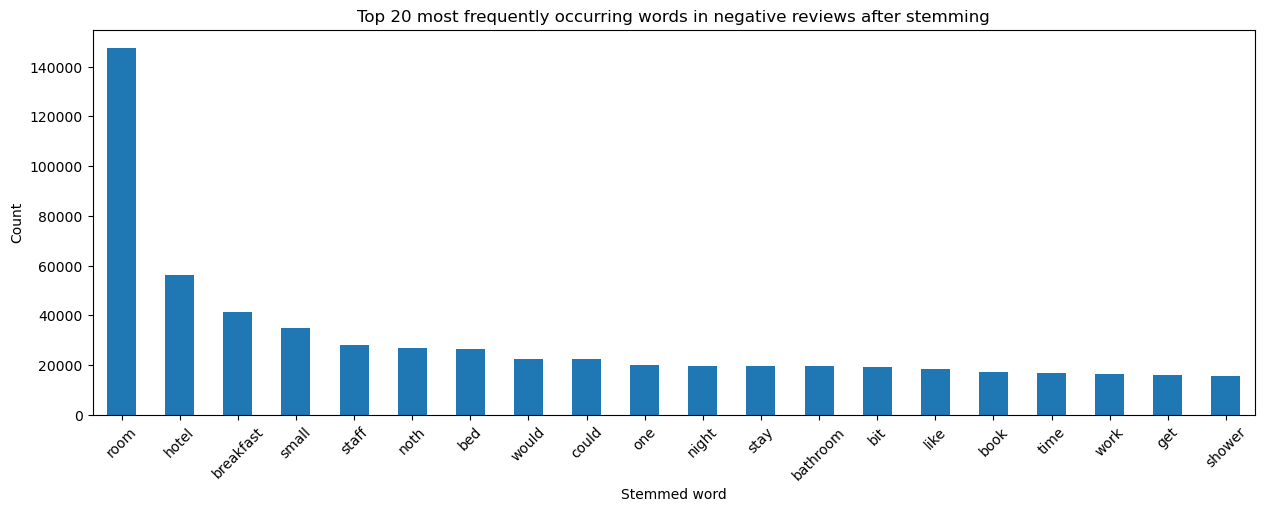

In [41]:
# create a bar chart for frequently occurring words in Negative Reviews after stemming
neg_word_counts_stem = pd.DataFrame(
    {"counts": neg_rev_train_t_stem.toarray().sum(axis=0)},
    index=neg_rev_vec_stem.get_feature_names_out()
).sort_values("counts", ascending=False)

neg_word_counts_stem.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words in negative reviews after stemming")
plt.xlabel("Stemmed word")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [42]:
# top 20 most frequently occuring words in Negative_Review column in training dataset
neg_word_counts_stem.sort_values("counts", ascending=False).head(20)

,counts
room,147407
hotel,56431
breakfast,41440
small,34772
staff,28029
noth,27088
bed,26676
would,22673
could,22285
one,20238


In [43]:
#add NEG_ tag to all negative review words' columns
neg_feature_names=list("NEG_{}".format(w) for w in neg_rev_vec_stem.get_feature_names_out())

In [44]:
# create dataframe for columns of each word in Negative_Review column of training dataset
neg_rev_train_t_df_stem = pd.DataFrame(
        data = neg_rev_train_t_stem.todense(), 
        columns = neg_feature_names)
neg_rev_train_t_df_stem.head(10)

,NEG_00,NEG_1,NEG_10,NEG_12,NEG_15,NEG_2,NEG_20,NEG_3,NEG_30,NEG_4,...,NEG_wi,NEG_wifi,NEG_window,NEG_without,NEG_work,NEG_worst,NEG_worth,NEG_would,NEG_wrong,NEG_year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# create dataframe for columns of each word in Negative_Review column of training dataset filled with test dataset
# if there are new words in the test set that were not present in the training data, they get ignored
neg_rev_test_t_df_stem = pd.DataFrame(
        data = neg_rev_test_t_stem.todense(), 
        columns = neg_feature_names)
neg_rev_test_t_df_stem.head(10)

,NEG_00,NEG_1,NEG_10,NEG_12,NEG_15,NEG_2,NEG_20,NEG_3,NEG_30,NEG_4,...,NEG_wi,NEG_wifi,NEG_window,NEG_without,NEG_work,NEG_worst,NEG_worth,NEG_would,NEG_wrong,NEG_year
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Transformed dataframes__:
 - pos_rev_train -> pos_rev_train_t_df_stem
 - pos_rev_test -> pos_rev_test_t_df_stem
 - neg_rev_train -> neg_rev_train_t_df_stem
 - neg_rev_test -> neg_rev_test_t_df_stem
 
Now, we need to merge all train dataframes into one dataframe.

In [46]:
# merge dataframes
train_dfs = [X_train_num.reset_index(drop=True),
             pos_rev_train_t_df_stem.reset_index(drop=True),
             neg_rev_train_t_df_stem.reset_index(drop=True)]

test_dfs = [X_test_num.reset_index(drop=True),
            pos_rev_test_t_df_stem.reset_index(drop=True),
            neg_rev_test_t_df_stem.reset_index(drop=True)]

final_train_df = pd.concat(train_dfs,axis=1)
final_test_df = pd.concat(test_dfs,axis=1)

In [47]:
final_train_df

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Days_Since_Review,Latitude,Longitude,Day,...,NEG_wi,NEG_wifi,NEG_window,NEG_without,NEG_work,NEG_worst,NEG_worth,NEG_would,NEG_wrong,NEG_year
0,392,8.8,35,1803,34,17,114,51.529441,-0.123374,11,...,0,0,2,0,0,0,0,1,0,0
1,556,8.0,17,2347,0,1,163,51.526535,-0.136168,21,...,0,0,0,0,0,0,0,0,0,0
2,102,9.6,6,604,74,7,640,41.380181,2.180688,2,...,0,0,0,0,0,0,0,0,0,0
3,128,8.4,53,1472,11,6,703,41.391717,2.159261,31,...,0,0,0,0,0,0,0,0,0,0
4,620,9.0,7,1974,5,1,222,51.506558,-0.004514,24,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360634,88,8.6,9,1059,8,1,215,48.849069,2.369748,31,...,0,0,0,0,0,0,0,0,0,0
360635,182,9.1,0,909,13,6,313,52.372835,4.883326,24,...,0,0,0,0,0,0,0,0,0,0
360636,694,8.7,4,2332,11,7,1,51.508372,0.035577,2,...,0,0,0,0,0,0,0,0,0,0
360637,52,8.2,0,712,8,3,529,48.849147,2.347193,21,...,0,0,0,0,0,0,0,0,0,0


In [48]:
final_test_df

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Days_Since_Review,Latitude,Longitude,Day,...,NEG_wi,NEG_wifi,NEG_window,NEG_without,NEG_work,NEG_worst,NEG_worth,NEG_would,NEG_wrong,NEG_year
0,36,7.0,19,251,2,1,297,48.872967,2.292623,10,...,0,0,0,0,1,0,0,0,0,0
1,687,8.9,287,2752,21,16,472,51.515052,-0.159239,18,...,0,0,0,0,1,0,0,1,0,0
2,1831,8.1,7,7105,26,1,148,51.499046,-0.191707,8,...,0,0,0,0,0,0,0,0,0,1
3,2623,8.7,14,12158,6,3,150,51.500961,-0.116591,6,...,0,0,0,0,0,0,0,0,0,0
4,26,5.2,14,465,0,6,668,45.450867,9.194866,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154555,396,7.9,280,3944,12,1,448,41.398932,2.202418,12,...,0,0,0,0,0,0,0,0,0,0
154556,740,7.4,3,5575,5,4,95,48.879484,2.355654,30,...,0,0,0,0,0,0,0,0,0,0
154557,301,8.4,0,3445,14,3,378,45.460855,9.188618,21,...,0,0,0,0,0,0,0,0,0,0
154558,133,9.1,0,521,16,1,499,51.515921,-0.159879,22,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# Save dataframes as csv
final_train_df.to_csv('final_train_df.csv', index=False)
final_test_df.to_csv('final_test_df.csv', index=False)
y_train.to_csv('final_y_train.csv', index=False)
y_test.to_csv('final_y_test.csv', index=False)

# Modelling

3. Fit a logistic regression model on the data and analyze the test and train accuracy. Find the top 20 words from the positive reviews that are most predictive of a positive sentiment (Reviewer_Score = 1). Similarly, find the top 20 words from the negative reviews that are most predictive of a negative sentiment (Reviewer_Score = 0). What actionable insights can you draw from these?

## Logistic Regression

In [50]:
# scale the data with StandardScaler
scaler = StandardScaler() # instantiate the scaler
scaler.fit(final_train_df) # fit the scaler to training data
X_train_scaled = scaler.transform(final_train_df) # transform the training data
# X_train = scaler.fit_transform(final_train_df) # fit and transfrom your training data on the same line (shortcut)
X_test_scaled = scaler.transform(final_test_df)

In [51]:
logreg = LogisticRegression(max_iter=500) # instantiate the model max_iter default = 100
logreg.fit(X_train_scaled, y_train) # fit the model to scaled train data

LogisticRegression(max_iter=500)

In [74]:
# Training and test score
print(f"Train score: {logreg.score(X_train_scaled, y_train)}")
print(f"Test score: {logreg.score(X_test_scaled, y_test)}")

Train score: 0.7946838805564568
Test score: 0.7912202380952381


While the accuracy value obtained from the logistic regression model may not be exceptionally high, the similarity between the test and train accuracy values indicates that our model is well-balanced and avoids the issues of overfitting or underfitting.

In [75]:
y_pred = logreg.predict(X_test_scaled)

In [76]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
confusion_matrix(y_test, y_pred)

array([[48077, 18368],
       [13901, 74214]])

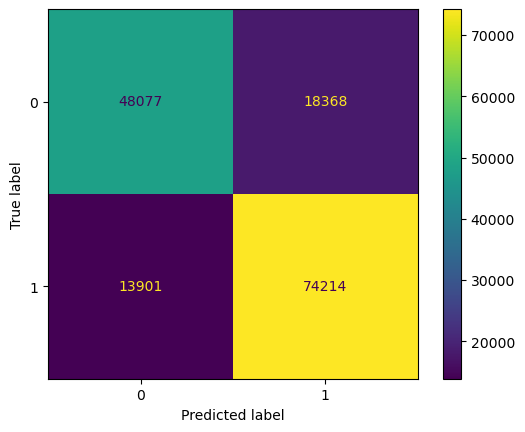

In [77]:
cm = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

In [78]:
TN = cm[0,0]
FN = cm[1,0]
FP = cm[0,1]
TP = cm[1,1]
print(TN,FN,FP,TP)

48077 13901 18368 74214


In [79]:
precision_lr = TP/(TP+FP)
precision_lr

0.8016029033721458

In [80]:
recall_lr = TP/(TP+FN)
recall_lr

0.8422402542132441

In [82]:
print(f"LogReg Precision score: {precision_lr}")
print(f"LogReg Recall score: {recall_lr}")

LogReg Precision score: 0.8016029033721458
LogReg Recall score: 0.8422402542132441


In [52]:
logreg.coef_ # show coefficients

array([[ 0.03711215,  0.53121637, -0.53007296, ...,  0.06954107,
        -0.01902419, -0.00123462]])

In [53]:
logreg_coefs_out = list(zip(final_train_df.columns, logreg.coef_[0])) #match coefficients and feature names
logreg_coefs_out

[('Additional_Number_of_Scoring', 0.03711215467478616),
 ('Average_Score', 0.5312163732086603),
 ('Review_Total_Negative_Word_Counts', -0.5300729644587888),
 ('Total_Number_of_Reviews', -0.026146959725061744),
 ('Review_Total_Positive_Word_Counts', -0.05188223491254758),
 ('Total_Number_of_Reviews_Reviewer_Has_Given', 0.0020491791854135824),
 ('Days_Since_Review', -0.26708681977500714),
 ('Latitude', -0.10102310518090955),
 ('Longitude', -1.0931787778373896),
 ('Day', -0.01394285800577889),
 ('Month', -0.16337818032084306),
 ('Year', -0.3013184758907727),
 ('Reviewer_Nationality_Australia', -0.013930518709475733),
 ('Reviewer_Nationality_Ireland', 0.0032773627636078144),
 ('Reviewer_Nationality_UAE', -0.06585270056299655),
 ('Reviewer_Nationality_UK', 0.04001422101109867),
 ('Reviewer_Nationality_USA', 0.09489995427105348),
 ('Reviewer_Nationality_Other', -0.06760018155299023),
 ('Hotel_Address_Amsterdam', 0.12222079763399052),
 ('Hotel_Address_Barcelona', -0.189533353288119),
 ('Hotel

In [54]:
logreg_coefs_out.sort(key = lambda t:t[1], reverse=True) #sort by coefficient magnitude (represents impact)

In [55]:
logreg_coefs_out

[('Hotel_Address_Vienna', 0.7881341286747794),
 ('Average_Score', 0.5312163732086603),
 ('POS_everyth', 0.3116688407630561),
 ('Hotel_Address_Milan', 0.2910285498973244),
 ('POS_excel', 0.24845302576670134),
 ('POS_staff', 0.2183487469903614),
 ('POS_great', 0.21617188916902302),
 ('NEG_noth', 0.2108652524349571),
 ('POS_amaz', 0.1949776441440666),
 ('POS_perfect', 0.18600476588274936),
 ('POS_love', 0.16303414514592707),
 ('POS_fantast', 0.15633977102544078),
 ('POS_beauti', 0.12986857694572712),
 ('Hotel_Address_Amsterdam', 0.12222079763399052),
 ('POS_wonder', 0.11806864514434726),
 ('POS_comfort', 0.11728933024363143),
 ('POS_troubl', 0.10550778725808672),
 ('POS_servic', 0.098334618095787),
 ('POS_stay', 0.09641139902646668),
 ('Reviewer_Nationality_USA', 0.09489995427105348),
 ('POS_fabul', 0.09187032640140558),
 ('POS_superb', 0.09008746213655117),
 ('POS_brilliant', 0.08824270484313247),
 ('Leisure_Trip', 0.08807177113945078),
 ('POS_best', 0.08782629415011173),
 ('POS_everi', 

In [56]:
coefs_df = pd.DataFrame(logreg_coefs_out, columns=['features','coeffs']) # convert to dataframe

In [59]:
coefs_df.head()

,features,coeffs
0,Hotel_Address_Vienna,0.788134
1,Average_Score,0.531216
2,POS_everyth,0.311669
3,Hotel_Address_Milan,0.291029
4,POS_excel,0.248453


In [60]:
POS_index = coefs_df['features'].str.contains('POS_', na=False)
NEG_index = coefs_df['features'].str.contains('NEG_', na=False)

In [61]:
POS_index.sum() # 500 'POS_' tagged word column

500

In [63]:
NEG_index.sum() # 500 'NEG_' tagged word column

500

### The top 20 words from the positive reviews that are most predictive of a positive review score

In [69]:
#extract only first 20 'POS_' tagged word column
POS_coefs_df = coefs_df[POS_index].reset_index(drop=True).head(20)
POS_coefs_df

,features,coeffs
0,POS_everyth,0.311669
1,POS_excel,0.248453
2,POS_staff,0.218349
3,POS_great,0.216172
4,POS_amaz,0.194978
5,POS_perfect,0.186005
6,POS_love,0.163034
7,POS_fantast,0.156340
8,POS_beauti,0.129869
9,POS_wonder,0.118069


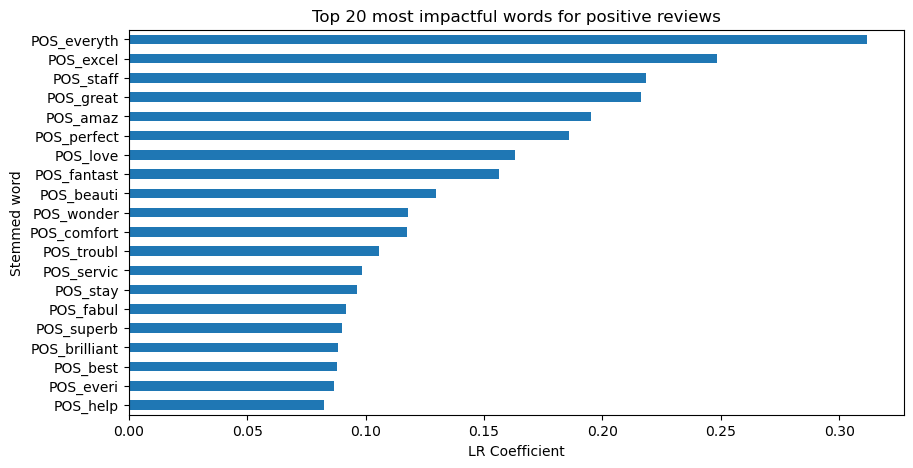

In [68]:
POS_coefs_df_sorted= POS_coefs_df.sort_values('coeffs', ascending=True)
POS_coefs_df_sorted.plot('features','coeffs',kind="barh", figsize=(10, 5), legend=False)
plt.title("Top 20 most impactful words for positive reviews")
plt.ylabel("Stemmed word")
plt.xlabel("LR Coefficient") # logistic regression coefficient
plt.xticks()
plt.show()

As expected, most of the words listed above has a very positive sentiment such as excel (excellent), great, amaz (amazing), perfect, love, etc. 

From above words it can be concluded that:
- staff's helpful interactions with guests,
- comfortability of the hotel,
- quality of the service at the hotel,
are some of the things that boosts guests' satisfaction and increase higher ratings.

### The top 20 words from the negative reviews that are most predictive of a negative review score

Stronger the negative correlation (smaller the negative correletion coefficient), less impracful on positive review, more impacful on negative review

In [72]:
# extract only last 20 'NEG_' tagged word column
NEG_coefs_df = coefs_df[NEG_index].sort_values('coeffs').head(20).reset_index(drop=True)
NEG_coefs_df

,features,coeffs
0,NEG_room,-0.296515
1,NEG_staff,-0.210579
2,NEG_small,-0.157387
3,NEG_dirti,-0.144037
4,NEG_poor,-0.139819
5,NEG_bed,-0.132602
6,NEG_star,-0.125358
7,NEG_rude,-0.109775
8,NEG_clean,-0.103640
9,NEG_hotel,-0.102126


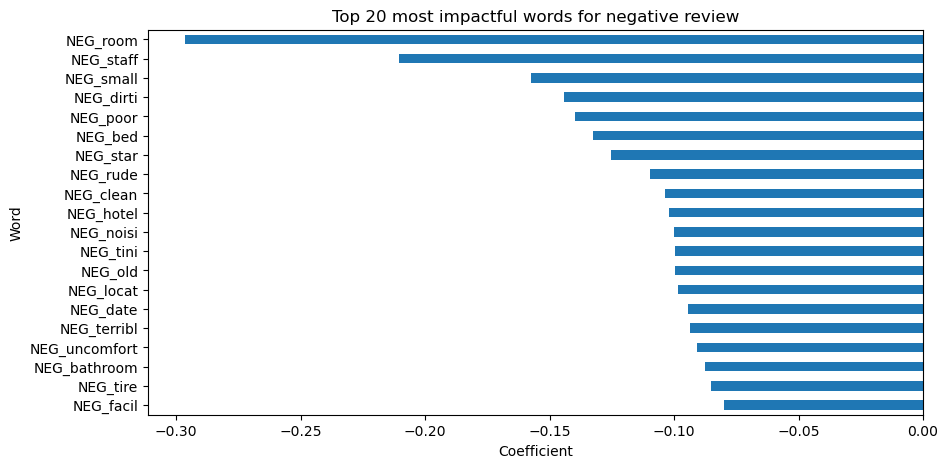

In [73]:
NEG_coefs_df_sorted= NEG_coefs_df.sort_values('coeffs', ascending=False)
NEG_coefs_df_sorted.plot('features','coeffs',kind="barh", figsize=(10, 5), legend=False)
plt.title("Top 20 most impactful words for negative review")
plt.ylabel("Word")
plt.xlabel("Coefficient")
plt.xticks()
plt.show()

Again, as expected, most of the words listed above has a very negative sentiment such as small, dirti (dirty), noisi (noisy), rude, terribl (terrible), etc. 

From above words it can be concluded that:
- cleanness of the hotel,
- demeanor exhibited by the staff,
- location of the hotel,
- dated decor and facilities in the hotel,
- noisiness of the hotel
are some of the things that affects guests' satisfaction and prevent higher ratings.